<h1 style="text-align:left;">Credit Risk Analysis</h1><br>
In this data analysis the behavior of German borrowers will be analysed.

<h3>Research Questions</h3><br>
Questions will be answered such as:
<ul>
<li>For which purpose do borrowers apply for credit loans?</li>
<li>Are there any differences regarding the credit loans between men and women?</li>
<li>Are there any differences regarding the credit loans between the different age classes?</li>
<li>Which factors determine whether the loan will have a low or high risk?</li>
</ul>

<h3>Goals of this project</h3>
<ul>
<li>Exploring the data and detecting <b>key patterns</b>. </li>
<li>Developing a <b>Neural Network (NN)</b> to predict whether a loan will be of a high or low risk.</li>
<li>Deploy the model to make predictions of credit risk.</li>
<li>Having fun while analysing the data and developing the model. </li>
<ul>
    
<img src="https://cdn.corporatefinanceinstitute.com/assets/cred.png" style="width:50%" align="left">

<h2>Outline:</h2>

1) **Importing the data**<br>
- [Importing the required libraries](#import_libraries)<br>
- [Importing and showing the data](#import_data)<br>

2) **Exploratory Data Analysis**<br>
- [Summary Statistics](#summary_statistics)<br>
- [Gender Analysis](#gender_analysis)<br>
- [Age Group Analysis](#age_groups)<br>
- [Wealth Analysis](#wealth_analysis)<br>
- [Correlations of variables](#correlations)<br>
- [Loan Purpose](#purpose_loans)<br>

3) **Modeling**<br>
- [Feature Engineering](#feature_engineering)
- [Predictive Modelling](#predictive_modelling)

4) **Model Deployment**<br>
- [Using docker and flask for model deployment](#model_deployment)

# 1.) Importing the required Python libraries and data

## Importing the required Python libraries
<a id="import_libraries"></a>

In [179]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import subplots
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Settings for warnings
import warnings
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

## Importing the data
<a id="import_data"></a>

<h3>Data description</h3>

The original data set is described here: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29. In the exercises, we will work with the adopted version of the data by Leonardo Ferreira (see References). In addition, credit amount was recalculated to the price niveau of 2021 in EUR by multiplying by the consumer price index of 1.682 and using an exchange rate of 0.511292.

<b>Age </b>(numerical)<br>
<b>Sex </b>(categorical: male, female)<br>
<b>Job </b>(numerical: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (categorical: own, rent, or free)<br>
<b>Saving accounts</b> (categorical: little, moderate, quite rich, rich)<br>
<b>Checking account</b> (categorical: little, moderate, quite rich, rich)<br>
<b>Credit amount</b> (numerical: recalculated to EUR and the price niveau of 2021)<br>
<b>Duration</b> (numerical: in month)<br>
<b>Purpose</b>(categorical: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (target variable (categorical): good or bad risk)<br>

<b>Selection of papers citing this data set:</b>
- Jeroen Eggermont and Joost N. Kok and Walter A. Kosters. Genetic Programming for data classification: partitioning the search space. SAC. 2004.
- Ke Wang and Shiyu Zhou and Ada Wai-Chee Fu and Jeffrey Xu Yu. Mining Changes of Classification by Correspondence Tracing. SDM. 2003.
- Avelino J. Gonzalez and Lawrence B. Holder and Diane J. Cook. Graph-Based Concept Learning. FLAIRS Conference. 2001.
- Oya Ekin and Peter L. Hammer and Alexander Kogan and Pawel Winter. Distance-Based Classification Methods. e p o r t RUTCOR ffl Rutgers Center for Operations Research ffl Rutgers University. 1996.
- Chotirat Ann and Dimitrios Gunopulos. Scaling up the Naive Bayesian Classifier: Using Decision Trees for Feature Selection. Computer Science Department University of California.
- Paul O' Dea and David Griffith and Colm O' Riordan. DEPARTMENT OF INFORMATION TECHNOLOGY. P. O'Dea.
- Paul O' Dea and Josephine Griffith and Colm O' Riordan. Combining Feature Selection and Neural Networks for Solving Classification Problems. Information Technology Department, National University of Ireland.

In [180]:
# Import the data
df = pd.read_csv("german_credit_data.csv", sep=";")

# Generate copy of the data
original_df = df.copy()

# Show first records of the data
print(df.shape)
df.head()

(1000, 10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1005,6,radio/TV,good
1,22,female,2,own,little,moderate,5118,48,radio/TV,bad
2,49,male,1,own,little,NaN,1803,12,education,good
3,45,male,2,free,little,little,6778,42,furniture/equipment,good
4,53,male,2,free,little,little,4188,24,car,bad


# 2.) Exploratory Data Analysis (EDA): 

Exploratory data analysis is a branch of statistics. It examines and appraises data of which there is little knowledge about their interrelationships. Many EDA techniques are used in data mining.

### Exploring the data using non-graphical techniques
<a id="summary_statistics"></a>
The first phase of this project is to see what is our data made about. Which variables are numerical or categorical and which columns have missing values, which is something we will address in the feature engineering phase.

### Summary of results
<ul>
<li>We have four <b>numerical</b> and six <b>categorical</b> features in the data set.</li>
<li>The average age of people in our dataset is 35.5.</li>
<li>The average number of jobs is 1.9.</li>
<li>The average credit amount borrowed is 2813 EUR, the median is 1994 EUR, the maximum is 15845 EUR.</li>
<li>The average duration time is 20 months.</li>
</ul>

In [181]:
# Rename column to avoid space in column name
df = df.rename(columns={"Credit amount": "Credit_amount"})

In [182]:
# Get infos of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [183]:
# Summary statistics of numeric variables
df.describe()

,Age,Job,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,2813.270000,20.903000
std,11.375469,0.653614,2427.528488,12.058814
min,19.000000,0.000000,215.000000,4.000000
25%,27.000000,2.000000,1174.500000,12.000000
50%,33.000000,2.000000,1994.500000,18.000000
75%,42.000000,2.000000,3416.250000,24.000000
max,75.000000,3.000000,15845.000000,72.000000


In [184]:
# Get column names
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [185]:
# Show first lines of the data frame
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1005,6,radio/TV,good
1,22,female,2,own,little,moderate,5118,48,radio/TV,bad
2,49,male,1,own,little,NaN,1803,12,education,good
3,45,male,2,free,little,little,6778,42,furniture/equipment,good
4,53,male,2,free,little,little,4188,24,car,bad


In [188]:
# Get the number of rows and columns in the data frame
df.shape

(1000, 10)

In [189]:
# Show the number of missing values
df.isna().sum().sort_values(ascending=False)

# Remove missing values (not recommended here 
# because there are many variables without missing 
# values from which useful insights can be derived)
# df = df.dropna()

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Exploring the data using graphical techniques

#### Target variable distribution

In [193]:
# Target variable distribution
import plotly.offline as py
import plotly.graph_objs as go
from collections import Counter

trace0 = go.Bar(
            x = df[df["Risk"] == 'good']["Risk"].value_counts().index.values,
            y = df[df["Risk"] == 'good']["Risk"].value_counts().values,
            name='Good credit',
            marker_color='rgba(76, 153, 0, 0.9)'
    )

trace1 = go.Bar(
            x = df[df["Risk"] == 'bad']["Risk"].value_counts().index.values,
            y = df[df["Risk"] == 'bad']["Risk"].value_counts().values,
            name='Bad credit',
            marker_color='rgba(153,0,0, 0.9)'
    )

data   = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution',
        width=500,
    height=500,
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

#### Credit amount by purpose

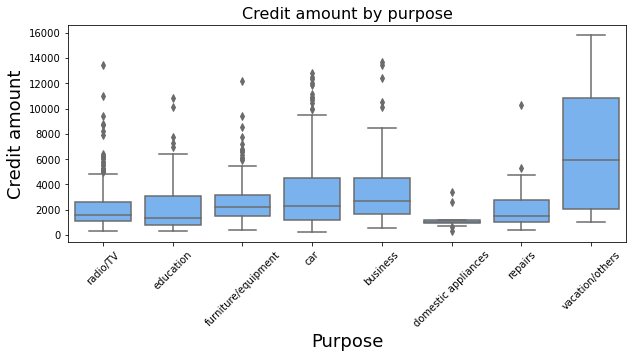

In [194]:
import seaborn as sns

plt.figure(figsize=(10,4))
g = sns.boxplot(x='Purpose', y='Credit_amount', 
                   data=df, color='#66B2FF')

g.set_title("Credit amount by purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_xlabel('Purpose', fontsize=18)
g.set_ylabel('Credit amount', fontsize=18) 
plt.show()

## Data Analysis by Gender

<a id="gender_analysis"></a>
In this section the data shall be analyzed with regard to the gender of the borrowers.

### Objectives 
<ul>
<li> Compare the distribution of variables in the dataset with regard to the gender. </li>
<li> Compare the number of male and female borrowers by age class.</li>
<li> Which are the main application reasons for a credit loan?</li>
<li> Does it vary by gender?</li>
<li> Is there a difference in the number of jobs by men and woman?</li>
<li> How many borrowers are unemployed?</li>
</ul>

### Summary of results
<ul>
<li>There are 2x more men than women in the dataset. </li>
<li>Most of the men that applied for a loan are between 20-40 years old.</li>
<li>Women were more likely to apply for a credit loan to buy furniture and equipment.</li>
<li>Men applied 2x more than women for a credit loan to invest in a business. </li>
<li>2x more women were unemployed compared to men. </li>
<li>2x more men worked in 3 jobs compared to women. </li>
<li>Suprisingly, most people that applied for a credit loan have two jobs!</li>
</ul>

In [195]:
# We have 2x more men applying for credit loans than women.
df["Sex"].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [196]:
# Plot age distributions of borrowers by gender
from plotly import subplots
import chart_studio.plotly as py
import plotly.graph_objs as go

by_age = df['Age'].values.tolist()
male_age = df['Age'].loc[df['Sex'] == 'male'].values.tolist()
female_age = df['Age'].loc[df['Sex'] == 'female'].values.tolist()

trace0 = go.Histogram(
    x=male_age,
    # histnorm='probability',
    name="Male borrowers",
    marker = dict(
        color = 'rgba(204,102,0, 0.9)',
    )
)
trace1 = go.Histogram(
    x=female_age,
    # histnorm='probability',
    name="Female borrowers",
    marker = dict(
        color = 'rgba(76,153,0, 0.9)',
    )
)
trace2 = go.Histogram(
    x=by_age,
    # histnorm='probability',
    name="All borrowers",
     marker = dict(
        color = 'rgba(0, 51, 102, 0.9)',
    )
)
fig = subplots.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                              subplot_titles=('Age distribution men',
                                              'Age distribution women', 
                                              'Age distribution (men & woman)'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age distribution of borrowers by gender', bargap=0.05)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

#### Distribution of credit amount per gender

In [201]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_Group"] = pd.cut(df.Age, interval, labels=cats)

df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

trace0 = go.Box(
    y=df_good["Credit_amount"],
    x=df_good["Age_Group"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit_amount'],
    x=df_bad['Age_Group'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

PlotlyRequestError: Authentication credentials were not provided.

#### Purpose of having credit loans with regard to gender

In [153]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


#### Application reasons for a loan by gender

In [158]:
m_purpose = sex_purpose['male'].values.tolist()
f_purpose = sex_purpose['female'].values.tolist()

# Round values
male_purpose   = ['%.2f' % elem for elem in m_purpose]
female_purpose = ['%.2f' % elem for elem in f_purpose]

male = go.Bar(
    y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
      'radio/TV', 'repairs', 'vacation/others'],
    x=male_purpose,
    name='Men',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(0, 51, 102, 0.9)',
        line = dict(
            color = 'rgba(0, 51, 102, 0.9)',
            width = 1)
    )
)
female = go.Bar(
    y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
      'radio/TV', 'repairs', 'vacation/others'],
    x=female_purpose,
    name='Women',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(102, 178, 255, 0.6)',
        line = dict(
            color = 'rgba(100, 100, 100, 1.0)',
            width = 1)
    )
)

data = [male, female]
layout = dict(
    title='Application reasons for a loan by gender',
     xaxis=dict(
        title='(% of gender)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=0,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Purpose for the Loan',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=0,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=16,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    barmode='stack'
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

#### Job distribution by gender (how many jobs do men and women have in %)

In [159]:
date_int = ["Job", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Job,,
0,12,10
1,64,136
2,197,433
3,37,111


## Data Analysis by Age Groups
<a id="age_groups"></a>
In this section we will create categorical groups based on the age column. The following categorical variables will belong to the <b> "Age_Group"</b> column:
<ul>
<li> <b>Young: </b> Clients age ranges from (19-29). </li>
<li> <b>Young Adults: </b> Clients age ranges from (30-40) </li>
<li> <b> Senior: </b>  Clients age ranges from (41-55) </li>
<li> <b>Elder: </b> Clients age is more than 55 years old </li>
</ul>

### Objectives
<ul>
<li> Create different age groups based on their age. </li>
<li> See the Credit amounts borrowed by clients belonging to each age group.</li>
<li> Get deeper in our analysis and determine which loans were high risk and see if there is any patterns with regards to age groups.  </li>
</ul>

### Summary of results
<ul>
<li>Borrowers in the youngest age class show the lowest average credit amount of all age classes.</li>
<li>The young and elederly groups had the highest ratio of high risk loans. With 45.29% of all the clients that belong to the young age group being considered of high risk.</li>
<li>The number of loans that were considered of high risk within the elderly group is 44.28% of the total amount of people considered in the elderly group.</li>
<li> Interesting enough these are the groups that are most likely to be unemployed or working part-time, since the youngest group either don't have the experience to have a job or they are studying in a university so they don't have enough time to work in a full-time job.</li>
</ul>

In [ ]:
# Ok we have to create for each group risky and non-risky loans.
df['Age_Group'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age']  <= 25), 'Age_Group'] = 'Student'
    col.loc[(col['Age'] >= 26) & (col['Age'] <= 35), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] >= 36) & (col['Age'] <= 65), 'Age_Group'] = 'Adult'
    col.loc[col['Age']  > 65, 'Age_Group'] = 'Senior' 
    
df.head()

# Age distribution with regard to credit risk
df_good = df.loc[df["Risk"] == 'good']['Age'].values.tolist()
df_bad = df.loc[df["Risk"] == 'bad']['Age'].values.tolist()
df_age = df['Age'].values.tolist()

# First plot
trace0 = go.Histogram(
    x=df_good,
    # histnorm='probability',
    name="Good Credit",
    marker=dict(color='rgb(76, 153, 0)')
)
# Second plot
trace1 = go.Histogram(
    x=df_bad,
    # histnorm='probability',
    name="Bad Credit",
    marker=dict(color='rgb(153,0,0)')
)
# Third plot
trace2 = go.Histogram(
    x=df_age,
    # histnorm='probability',
    name="Overall Age",
    marker=dict(color='rgb(0,51,102)')
)

# Creating the grid
fig = subplots.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Age distribuition good credits',
                                          'Age distribuition bad credits', 
                                          'General age distribuition')
                          )
# Setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age distribuition with regard to credit risk', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [80]:
# Take credit amount values into a list
young = df['Credit_amount'].loc[df['Age_Group'] == 'Young'].values.tolist()
young_adults = df['Credit_amount'].loc[df['Age_Group'] == 'Young Adults'].values.tolist()
senior = df['Credit_amount'].loc[df['Age_Group'] == 'Senior'].values.tolist()
elder_credit = df['Credit_amount'].loc[df['Age_Group'] == 'Elder'].values.tolist()

# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)

# Printing average of the lists
print("Young:       ", round(Average(young), 0))
print("Young_adults:", round(Average(young_adults), 0))
print("Senior:      ", round(Average(senior), 0))
print("Elder_credit:", round(Average(elder_credit), 0))

# Create the box plots by age category
young_credit = go.Box(
    y = young,
    name = "Young",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(150, 198, 109)'),
    line = dict(
        color = 'rgb(150, 198, 109)')
)

young_adults_credit = go.Box(
    y = young_adults,
    name = "Young Adults",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(204, 204, 0)'),
    line = dict(
        color = 'rgb(204, 204, 0)')
)

senior_credit = go.Box(
    y = senior,
    name = "Seniors",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(153, 0, 0)'),
    line = dict(
        color = 'rgb(153, 0, 0)')
)

elder_credit = go.Box(
    y = elder_credit,
    name = "Elders",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(180, 121, 72)'),
    line = dict(
        color = 'rgb(180, 121, 72)')
)

data = [young_credit, young_adults_credit, senior_credit, elder_credit]

layout = dict(
    title="Credit amount by age group", 
    xaxis = dict(title="Age group"),
    yaxis= dict(title="Credit amount")
)

fig = dict(data=data, layout=layout)
iplot(fig, filename="Box Plot")

Young:        2657.0
Young_adults: 2903.0
Senior:       2895.0
Elder_credit: 2950.0


In [82]:
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df  = df.loc[df['Risk'] == "bad"]

good_credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1005,6,radio/TV,good,Elder
2,49,male,1,own,little,NaN,1803,12,education,good,Senior
3,45,male,2,free,little,little,6778,42,furniture/equipment,good,Senior
5,35,male,1,free,NaN,NaN,7787,36,education,good,Young Adults
6,53,male,2,own,quite rich,NaN,2438,24,furniture/equipment,good,Senior


In [83]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": good_credit_df['Age_Group'],
            "y": good_credit_df['Credit_amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(76, 153, 0)'
            }
        },
        {
            "type": 'violin',
            "x": bad_credit_df['Age_Group'],
            "y": bad_credit_df['Credit_amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(153, 0, 0)'
            }
        }
    ],
    "layout" : {
        "title": "Distribution of Credit borrowed by Age Group",
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 2,
        "violinmode": "overlay"
    }
}

iplot(fig, filename = 'Age-Housing', validate=False)

In [86]:
# Lets find loans by age group and by the level of risk and plot them in a bar chart.

# Age Groups
young_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'good')].sum()
young_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'bad')].sum()
young_adult_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'good')].sum()
young_adult_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'bad')].sum()
senior_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'good')].sum()
senior_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'bad')].sum()
elder_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'good')].sum()
elder_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'bad')].sum()

# Percentages
young_good_p = young_good/(young_good + young_bad) * 100
young_bad_p = young_bad/(young_good + young_bad) * 100
young_adult_good_p = young_adult_good/(young_adult_good + young_adult_bad) * 100
young_adult_bad_p = young_adult_bad/(young_adult_good + young_adult_bad) * 100
senior_good_p = senior_good/(senior_good + senior_bad) * 100
senior_bad_p =  senior_bad/(senior_good + senior_bad) * 100
elder_good_p = elder_good/(elder_good + elder_bad) * 100
elder_bad_p = elder_bad/(elder_good + elder_bad) * 100

# Round Percentages
young_good_p = str(round(young_good_p, 2))
young_bad_p = str(round(young_bad_p, 2))
young_adult_good_p = str(round(young_adult_good_p, 2))
young_adult_bad_p = str(round(young_adult_bad_p, 2))
senior_good_p = str(round(senior_good_p, 2))
senior_bad_p = str(round(senior_bad_p, 2))
elder_good_p = str(round(elder_good_p, 2))
elder_bad_p = str(round(elder_bad_p, 2))

x = ["Young", "Young Adults", "Senior", "Elder"]

good_loans = go.Bar(
    x=x,
    y=[young_good, young_adult_good, senior_good, elder_good],
    name="Good Loans",
    text=[young_good_p + '%', young_adult_good_p + '%', senior_good_p + '%', elder_good_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgba(76, 153, 0, 0.8)',
        line=dict(
            color='rgba(76, 153, 0, 0.8)',
            width=1.5),
        ),
    opacity=0.9
)

bad_loans =  go.Bar(
    x=x,
    y=[young_bad, young_adult_bad, senior_bad, elder_bad],
    name="Bad Loans",
    text=[young_bad_p + '%', young_adult_bad_p + '%', senior_bad_p + '%', elder_bad_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgba(153, 0, 0, 0.8)',
        line=dict(
            color='rgba(153, 0, 0, 0.8)',
            width=1.5),
        ),
    opacity=0.9
)

data = [good_loans, bad_loans]

layout = dict(
    title="Type of loan by age group", 
    xaxis = dict(title="Age group"),
    yaxis= dict(title="Credit amount")
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='grouped-bar-direct-labels')

## Wealth Analysis
<a id="wealth_analysis"></a>
In this section we will analyse the amount of wealth our clients have by analyzing their checking accounts and whether the wealth status of our clients contribute to the risk of the loans Lending Club is issuing to customers.

### Summary of results
<ul>
<li> Individuals belonging to the <b>"little wealth"</b>  group, had a higher probability of being bad risk loans than other types fo groups.</li>
<li> The <b>higher the wealth</b>, the lower the probability of being a bad risk loan. </li>
</ul>

In [87]:
# We have some missing value so we will just ignore the missing values in this analysis.
df["Checking account"].unique()
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk', 'Age_Group'],
      dtype='object')

In [88]:
cross_checking = pd.crosstab(df['Risk'], df['Checking account']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2], index=['little', 'moderate', 'rich'])

cross_checking = cross_checking.round(decimals)
cross_checking

Checking account,little,moderate,rich
Risk,,,
bad,49.27,39.03,22.22
good,50.73,60.97,77.78


In [91]:
import chart_studio.plotly as py
import plotly.graph_objs as go

bad_little = cross_checking['little'][0]
good_little = cross_checking['little'][1]
bad_moderate = cross_checking['moderate'][0]
good_moderate = cross_checking['moderate'][1]
bad_rich = cross_checking['rich'][0]
good_rich = cross_checking['rich'][1]

little = go.Bar(
    x=['High Risk', 'Low Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='rgb(153, 0, 0)',
         line=dict(
            color='rgb(153, 0, 0)',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['High Risk', 'Low Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['High Risk', 'Low Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='rgb(76, 153, 0)',
         line=dict(
            color='rgb(76, 153, 0)',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

data=[little, moderate, rich]

fig = subplots.make_subplots(rows=1, cols=3, subplot_titles=('Little wealth', 'Moderate wealth', 'Rich wealth'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)

fig['layout'].update(height=400, width=800, title='Levels of risk by wealth')

iplot(fig, filename='make-subplots-multiple-with-titles')

## High Risk Loans vs Low Risk Loans
In this section we will analyze both high and low risk loans. The most important thing is to find patters that could describe the some sort of correlation with these output values.

## Correlation of variables
<a id="correlations"></a>
In this part of the analysis, we want to look at to which features directly affect the risk of the loan. In order to see these patterns, the first thing we have to do is to create a new column named "Risk_int" (Stands for risk in integer form) and involve this column in the correlation heatmap plot. "0" will stand for "high risk" loans and "1" will stand for "low risk" loans.

## Summary
<ul>
<li>The higher the credit amount borrowed, the most likely the loan will end up bad.</li>
<li>The higher the duration of the loan, the most likely the loan will turn out to be bad.</li>
</ul>

In [92]:
df['Risk_int'] = np.nan
lst = [df]

for col in lst:
    col.loc[df['Risk'] == 'bad', 'Risk_int'] = 0 
    col.loc[df['Risk'] == 'good', 'Risk_int'] = 1
    
df['Risk_int'] = df['Risk_int'].astype(int)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group,Risk_int
0,67,male,2,own,NaN,little,1005,6,radio/TV,good,Elder,1
1,22,female,2,own,little,moderate,5118,48,radio/TV,bad,Young,0
2,49,male,1,own,little,NaN,1803,12,education,good,Senior,1
3,45,male,2,free,little,little,6778,42,furniture/equipment,good,Senior,1
4,53,male,2,free,little,little,4188,24,car,bad,Senior,0


In [98]:
import chart_studio.plotly as py
import plotly.figure_factory as ff

corr = df.corr()

arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Greens')

fig.layout.title = 'Pearson correlation: What determines risk in loans?'
iplot(fig, filename='annotated_heatmap')

In [28]:
# Looking at the correlations between variables using a scatterplot matrix
import chart_studio.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

numeric_vals = df.select_dtypes(exclude=['object'])

risks = df['Risk'].values.tolist()

colormap = ['rgb(153, 0, 0)', 'rgb(76, 153, 0)']

numeric_matrix = numeric_vals.to_numpy()

dataframe = pd.DataFrame(numeric_matrix,
                         columns=['Credit_amount', 'Duration', 'Job', 'Age', 'Risk'])

dataframe['Risk'] = pd.Series(risks)

fig = ff.create_scatterplotmatrix(dataframe, 
                                  diag='histogram', 
                                  index='Risk', 
                                  colormap=colormap,
                                  height=800, 
                                  width=800,
                                 opacity=0.6)
iplot(fig, filename='Histograms along Diagonal Subplots')

In [29]:
# The higher the credit amount, the higher the risk of the loan?
# The higher the duration of the loan, the higher the risk of the loan?

bad_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'bad'].values.tolist()
good_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'good'].values.tolist()
bad_duration = df['Duration'].loc[df['Risk'] == 'bad'].values.tolist()
good_duration = df['Duration'].loc[df['Risk'] == 'good'].values.tolist()

bad_loans = go.Scatter(
    x = bad_duration,
    y = bad_credit_amount,
    name = 'Bad Loans',
    mode = 'markers',
    marker = dict(
        size = 6,
        color = 'rgba(153, 0, 0, 0.7)',
        line = dict(
            width = 1,
            color = 'rgb(153, 0, 0)'
        )
    )
)

good_loans = go.Scatter(
    x = good_duration,
    y = good_credit_amount,
    name = 'Good Loans',
    mode = 'markers',
    marker = dict(
        size = 6,
        color = 'rgba(76, 153, 0, 0.7)',
        line = dict(
            width = 1,
            color = 'rgb(76, 153, 0)'
        )
    )
)

data = [bad_loans, good_loans]

layout = dict(title = 'Correlation of Risk with Credit Amount Borrowed',
              yaxis = dict(zeroline = False, title='Credit Amount'),
              xaxis = dict(zeroline = False, title='Duration'),
              height=500, 
              width=800
             )

fig = dict(data=data, 
           layout=layout
          )
iplot(fig, filename='styled-scatter')

## Exploring Purposes of Loans
<a id="purpose_loans"></a>
In this section my main aim is to see what purposes where most likely to bring most risk, in other words which of these pruposes were more likely to be considered high risk loans. Also, I would like to explore the operative side of the business, by determining which purposes where the ones that contributed the most towards loans issued.

## Summary 
<ul> 
<li><b>Cars</b>, <b> Radio/TV</b> and <b> Furniture and Equipment</b> made more than 50 % of the total risk and has the <b>highest distribution</b> of credit issued</li>
<li>The <b> rest of the purposes</b> were not frequent purposes in applying for a loan. </li>
<li> <b>Cars</b> and <b>Radio/TV</b> purposes were the less risky from the operative perspective since it had the widest gap between good and bad risk. </li>
</ul>

In [30]:
import chart_studio.plotly as py
import plotly.graph_objs as go


radio_tv = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'radio/TV'].values)
education = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'education'].values)
furniture = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'furniture/equipment'].values)
car = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'car'].values)
business = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'business'].values)
domestic_app = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'domestic appliances'].values)
repairs = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'repairs'].values)
vacation_others = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'vacation/others'].values)

df_purposes = pd.DataFrame(data=[[radio_tv, education, furniture, car, business, domestic_app, repairs, vacation_others]],
                          columns=df["Purpose"].unique())

print(df_purposes)

data = [
    go.Scatterpolar(
        r = [radio_tv, education, furniture,car, business, domestic_app, repairs, vacation_others],
        theta = df['Purpose'].unique().tolist(),
        line = dict(
            color = 'rgb(76, 153, 0)'
        ),
        mode = 'lines+markers',
        fill='toself',
        marker = dict(
            color = 'rgb(76, 153, 0)',
            symbol='square',
            size=6
        )
    )
]

layout = go.Layout(
    showlegend = False,
    title= "Credit Distribution by Purpose",
    paper_bgcolor = "rgb(255, 255, 255)"
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = 'polar/basic')

   radio/TV  education  furniture/equipment      car  business  \
0    599030     146090               477409  1092087    346860   

   domestic appliances  repairs  vacation/others  
0                15459    51615            84720  


In [31]:
df['Purpose'].unique()

cross_purpose = pd.crosstab(df['Purpose'], df['Risk']).apply(lambda x: x/x.sum() * 100)
cross_purpose = cross_purpose.round(decimals=2)
cross_purpose.sort_values(by=['bad'])

Risk,bad,good
Purpose,,
domestic appliances,1.33,1.14
vacation/others,1.67,1.00
repairs,2.67,2.00
education,7.67,5.14
business,11.33,9.00
furniture/equipment,19.33,17.57
radio/TV,20.67,31.14
car,35.33,33.00


In [32]:
# This will be x
purposes = df['Purpose'].unique().tolist()
purposes = sorted(purposes)

good_purposes = cross_purpose["good"].values.tolist()
bad_purposes = cross_purpose["bad"].values.tolist()

good = go.Bar(
    x=purposes,
    y=good_purposes,
    name='Low Risk',
    text='%',
    marker=dict(
        color='rgb(76, 153, 0)',
        line=dict(
            color='rgb(76, 153, 0)',
            width=1.5
        )
    ),
)
bad = go.Bar(
    x=purposes,
    y=bad_purposes,
    name='High Risk',
    text = '%',
    marker=dict(
        color='rgb(153, 0, 0)',
        line=dict(
            color='rgb(153, 0, 0)',
            width=1.5
        )
    ),
)
data = [good, bad]
layout = go.Layout(
    title='Which Purpose Carried the Highest Risk?',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage(%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='style-bar')

In [33]:
cross_credit = df.groupby(['Risk', 'Purpose'], as_index=False).Credit_amount.sum()

good_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "good"].values.tolist()
bad_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "bad"].values.tolist()

good_risk = {"x": good_amnt, 
          "y": purposes, 
          "marker": {"color": "rgb(76, 153, 0)", "size": 6}, 
          "mode": "markers", 
          "name": "Good Risk", 
          "type": "scatter"
}

bad_risk = {"x": bad_amnt, 
          "y": purposes, 
          "marker": {"color": "rgb(153, 0, 0)", "size": 6}, 
          "mode": "markers", 
          "name": "Bad Risk", 
          "type": "scatter", 
}

data = [good_risk, bad_risk]
layout = {"title": "Credit Loan Applications by Purpose", 
          "xaxis": {"title": "Credit Amount Borrowed", }, 
          "yaxis": {"title": ""},
          "width": 800,
          "height": 500}

fig = dict(data=data, layout=layout)
iplot(fig, filename='basic_dot-plot')

# 3.) Predictive Modeling of Credit Risk
<a id="predictive_modelling"></a>

Predictive modeling uses statistics and machine learning to predict outcomes. Most often, the predicted event is in the future, but predictive modeling can be applied to any type of unknown event, regardless of when it occurred. In this section, the goal is to develop a model to predict credit risks.


In [34]:
# Check missing values in our dataframe
original_df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [35]:
# We will drop the columns that have missing values although we will be loosing some information. Hopefully this does not cause
# the model to underfit in the future.
original_df.drop(['Checking account', 'Saving accounts'], axis=1, inplace=True)

In [36]:
original_df.isnull().sum().sort_values(ascending=False)

Age              0
Sex              0
Job              0
Housing          0
Credit amount    0
Duration         0
Purpose          0
Risk             0
dtype: int64

In [37]:
# Feature Engineering (we cannot delete the missing values because we have too litle information)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit

original_df["Risk"].value_counts() # 70% is good risk and 30% is bad risk.

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in stratified.split(original_df, original_df["Risk"]):
    strat_train = original_df.loc[train]
    strat_test = original_df.loc[test]

# The main purpose of this code is to have an approximate ratio
# of 70% good risk and 30% bad risk in both training and testing sets.
strat_train["Risk"].value_counts() / len(df) 
strat_test["Risk"].value_counts() / len(df)

good    0.14
bad     0.06
Name: Risk, dtype: float64

In [38]:
# Have our new train and test data
train = strat_train
test = strat_test

# Our features
X_train = train.drop('Risk', axis=1)
X_test = test.drop('Risk', axis=1)

# Our Labels we will use them later
y_train = train["Risk"]
y_test = test["Risk"]

In [39]:
# Scikit-Learn does not handle dataframes in pipeline so we will create our own class.
# Reference: Hands-On Machine Learning
from sklearn.base import BaseEstimator, TransformerMixin
# Create a class to select numerical or cateogrical columns.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit (self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [41]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

numeric_train_df = X_train.select_dtypes(exclude=['object'])
numeric_test_df = X_test.select_dtypes(exclude=['object'])

categorical_train_df = X_train.select_dtypes(['object'])
categorical_test_df = X_test.select_dtypes(['object'])

numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(numeric_train_df.columns.values.tolist())),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('select_categoric', DataFrameSelector(categorical_train_df.columns.values.tolist())),
    ('encoding', CategoricalEncoder(encoding='onehot-dense'))
])

# Combine both pipelines
main_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numerical_pipeline),
    ('cat_pipeline', categorical_pipeline)
])

X_train_scaled = main_pipeline.fit_transform(X_train)
X_test_scaled = main_pipeline.fit_transform(X_test)

In [42]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train_scaled = encode.fit_transform(y_train)
y_test_scaled = encode.fit_transform(y_test)

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Implement gridsearchcv to see which are our best p

params = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3, 4, 5]}

svc_clf = SVC(random_state=42, probability=True)

grid_search_cv = GridSearchCV(svc_clf, params)
grid_search_cv.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
grid_search_cv.best_estimator_

SVC(C=0.95, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
grid_search_cv.best_params_

{'C': 0.95, 'degree': 3, 'kernel': 'rbf'}

In [46]:
svc_clf = grid_search_cv.best_estimator_
svc_clf.fit(X_train_scaled, y_train_scaled)

SVC(C=0.95, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [47]:
score = svc_clf.score(X_train_scaled, y_train_scaled)

# Accuracy score (training data set)
print("Accuracy score:", "{:.4f}".format(score))

Accuracy score: 0.7600


In [48]:
from sklearn.model_selection import cross_val_score

# Let's make sure the data is not overfitting
svc_clf = SVC(kernel='rbf', C=1, random_state=42)
scores = cross_val_score(svc_clf, X_train_scaled, y_train_scaled)

# Accuracy score (mean from cross validation using the train data set)
print("Accuracy score (mean from cross validation using the train data set):", "{:.4f}".format(scores.mean()))

Accuracy score (mean from cross validation using the train data set): 0.7163


In [49]:
from sklearn.metrics import accuracy_score

svc_clf.fit(X_train_scaled, y_train_scaled)
y_pred = svc_clf.predict(X_test_scaled)

# Predictions (0/1 vector of high/low risk)
print("Predictions (0/1 vector of high/low risk): \n", y_pred, "\n")

# Accuracy score (test data set)
score=accuracy_score(y_test_scaled, y_pred)
print("Accuracy score (test data set): \n", "{:.4f}".format(score))

Predictions (0/1 vector of high/low risk): 
 [1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 

Accuracy score (test data set): 
 0.7000


## References
<ul> 
<li> <a href="https://www.kaggle.com/janiobachmann/german-credit-analysis-a-risk-perspective"> German Credit Analysis || A Risk Perspective</a> by Janio Martinez Bachmann</li>
<li> <a href="https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline?scriptVersionId=7037624"> German Credit risk [FinancialEDA]</a> by Leonardo Ferreira</li>
<li> <a href="https://www.finanz-tools.de/inflation/inflationsraten-deutschland">Inflationsraten in Deutschland</a> by finance-tools.de</li>
</ul>